In [88]:
# Kerakli modul, kutubxonalar chaqirildi
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

In [89]:
# Faylni pandas kutubxonasi yordamida ochib olindi
df1 = pd.read_csv("auto_costs.csv")
df = df1.copy()
df1.isnull().sum()  # Nol qiymatlar yo'qligi tekshirildi

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [90]:


def replace_str_to_int(df):
    
    """        Xususiyatlar kiritilgan ustunlar narx ustuniga qanday ta'sir 
       qilishini ko'rish uchun, xususiyatlar ma'lumot turini integerga o'girib olamiz """
    
    df['name'] = df['name'].replace({'\W\S+':''},regex=True).str.title()
    df['name'] = df['name'].replace({'Alfa':'Alfa Romeo','Vw':"Volkswagen",'Isuzu ':'Isuzu', 
                                     "Vokswagen":'Volkswagen','Toyouta':'Toyota',
                                     'Maxda':'Mazda','Porcshce':'Porsche'})
    # Bu yerda gas==1 , diesel==0
    df['fueltypes'] = df['fueltypes'].replace({"diesel":0, 'gas':1})

    # carbody(avto turi) convertible==3, hardtop==1, hatchback=2, sedan==0, wagon==4
    df['carbody']=df['carbody'].replace({'convertible':3,'hardtop':1,'hatchback':2,'sedan':0,"wagon":4})

    # aspiration(dvigitel turi) str==0, turbo==1
    df['aspiration']=df['aspiration'].replace({'std':0,'turbo':1})

    # enginelocation(mator joylashuvi) front==1, rear==0
    df['enginelocation'] = df['enginelocation'].replace({'front':1,'rear':0})

    df['doornumbers'] = df['doornumbers'].replace({'four':4,'two':2})

    # driverwheels 4wd(4 ta balon tortishi)==3, fwd(old balon tortishi)==2, rwd(orqa balon tortishi)==1
    df['drivewheels'] = df['drivewheels'].replace({'4wd':3,"fwd":2,'rwd':1})

    df['cylindernumber']=df['cylindernumber'].replace({'eight':8, 'five':5,'four':4,'six':6,'three':3,'twelve':12,'two':2})
    
    return df

In [91]:
# df.drop(["ID",'name','fuelsystem','enginelocation','symboling','enginetype','carheight','fueltypes', 'aspiration','doornumbers','carbody','stroke','compressionratio','peakrpm'], inplace=True, axis=1)

In [92]:
def correlation_data(df):
    """
        Ma'lumotlarni narxga ta'sir qilishini bilish uchun 'pearson' metodi orqali karrelatsiya qilindi
    """
    correl = df.corr(method='pearson')
    return correl

In [93]:
def scat_mat(correl):
    """
        Avtomabil xususiyatlarining narxga ta'siri (correlatsia) grafika ko'rinishida
    """
    corr = np.corrcoef(np.random.randn(22, 200))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(15,10))
    sns.heatmap(correl,cmap='bwr_r', annot=True, mask=mask, cbar_kws={"orientation": "horizontal"})
    plt.title("Avtomabil xususiyatlarining narxga ta'siri (correlatsia) grafika ko'rinishida:")
    plt.show()

In [94]:
def scat_mat_clear(df):
    """
        Eng ko'p avtomabil narxiga ta'sir qilayotgan hususiyatlar (correlatsia) grafika ko'rinishida
    """
    corr = np.corrcoef(np.random.randn(15, 200))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(18,12))
    ddf = df.copy()
    ddf.drop(['symboling','carheight','compressionratio','stroke','carbody','doornumbers','peakrpm'],inplace=True,axis=1)
    ddf = ddf.corr()
    sns.heatmap(ddf,mask=mask, annot=True, cmap='bwr_r', cbar_kws={"orientation": "horizontal"})
    plt.title("Eng ko'p avtomabil narxiga ta'sir qilayotgan hususiyatlar (correlatsia) grafika ko'rinishida:")
    plt.show()

In [95]:
def hist_price(df):
    """
        Eng ko'p avtomabil narxiga ta'sir qilayotgan hususiyatlar (correlatsia histogram) grafika ko'rinishida
    """
    ddf = df.copy()
    ddf.drop(['symboling','carheight','compressionratio','stroke','carbody','doornumbers','peakrpm'],inplace=True,axis=1)

    sns.pairplot(ddf,kind='hist', x_vars=['fueltypes', 'aspiration', 'drivewheels', 'enginelocation', 'wheelbase',
           'carlength', 'carwidth'] ,y_vars=['price'])
    plt.suptitle("Eng ko'p avtomabil narxiga ta'sir qilayotgan hususiyatlar (correlatsia histogram) grafika ko'rinishida:\n",fontweight='bold', fontsize=14)
    sns.pairplot(ddf,kind='hist', x_vars=['curbweight', 'cylindernumber', 'enginesize',
           'boreratio', 'horsepower', 'citympg', 'highwaympg'] ,y_vars=['price'])

    plt.show()
    
    

In [96]:
df = replace_str_to_int(df) # ma'lumotlar str dan intga o'tqazildi
df.drop(['name','ID','enginetype','fuelsystem'], inplace=True, axis=1) # narxga ta'sir qilmaydigan ustunlar o'chirildi
# df

In [97]:
### Train test split ###

x = df.drop(['symboling','carheight','compressionratio','stroke','carbody','doornumbers','peakrpm','price'],axis=1)
y = df['price']
# lab = preprocessing.LabelEncoder()
# y_transformed = lab.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=2)

model = LinearRegression()
fitt = model.fit(x_train, y_train)

pred = fitt.predict(x_test)


In [98]:
print("Avtomobil hususiyatlari va narxlari kiritilgan faylning bosh 10 qatori (original):\n")
print(df1.head(10))


Avtomobil hususiyatlari va narxlari kiritilgan faylning bosh 10 qatori (original):

   ID  symboling                      name fueltypes aspiration doornumbers  \
0   1          3        alfa-romero giulia       gas        std         two   
1   2          3       alfa-romero stelvio       gas        std         two   
2   3          1  alfa-romero Quadrifoglio       gas        std         two   
3   4          2               audi 100 ls       gas        std        four   
4   5          2                audi 100ls       gas        std        four   
5   6          2                  audi fox       gas        std         two   
6   7          1                audi 100ls       gas        std        four   
7   8          1                 audi 5000       gas        std        four   
8   9          1                 audi 4000       gas      turbo        four   
9  10          0       audi 5000s (diesel)       gas      turbo         two   

       carbody drivewheels enginelocation  whe

In [99]:
print("Avtomobil hususiyatlari va narxlari kiritilgan faylning bosh 10 qatori (tozalangan):\n")
print(df.head(10))


Avtomobil hususiyatlari va narxlari kiritilgan faylning bosh 10 qatori (tozalangan):

   symboling  fueltypes  aspiration  doornumbers  carbody  drivewheels  \
0          3          1           0            2        3            1   
1          3          1           0            2        3            1   
2          1          1           0            2        2            1   
3          2          1           0            4        0            2   
4          2          1           0            4        0            3   
5          2          1           0            2        0            2   
6          1          1           0            4        0            2   
7          1          1           0            4        4            2   
8          1          1           1            4        0            2   
9          0          1           1            2        2            3   

   enginelocation  wheelbase  carlength  carwidth  ...  cylindernumber  \
0               1       8

In [100]:
corel = correlation_data(df)
print( f"Avtomabil xususiyatlarining narxga ta'siri(Correlatsia): \n\n{corel['price']}")

Avtomabil xususiyatlarining narxga ta'siri(Correlatsia): 

symboling          -0.079978
fueltypes          -0.105679
aspiration          0.177926
doornumbers         0.031835
carbody            -0.118774
drivewheels        -0.577992
enginelocation     -0.324973
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
cylindernumber      0.718305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64


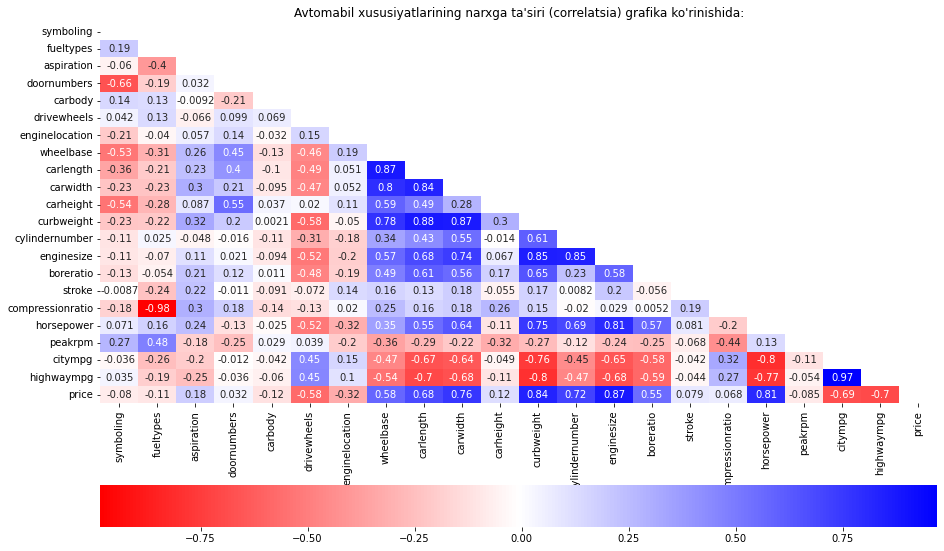

In [101]:
scat_mat(corel)


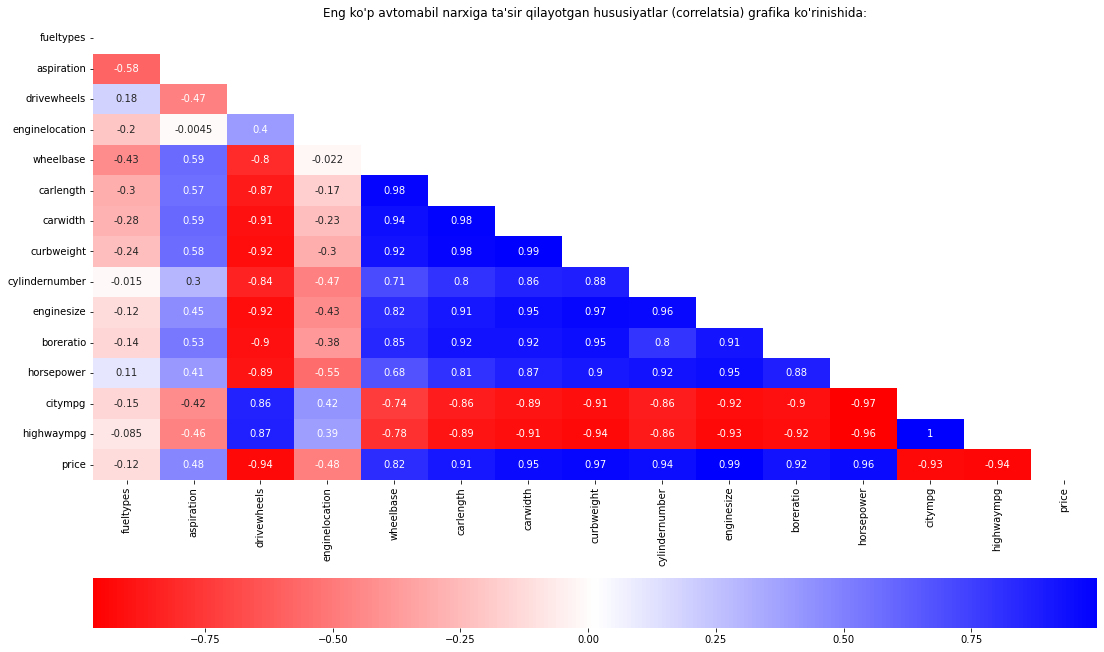

In [102]:
scat_mat_clear(corel)

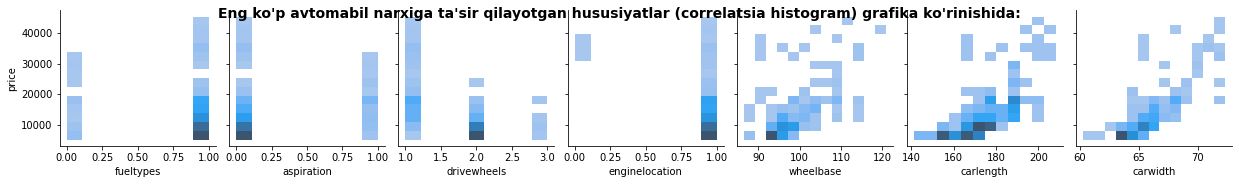

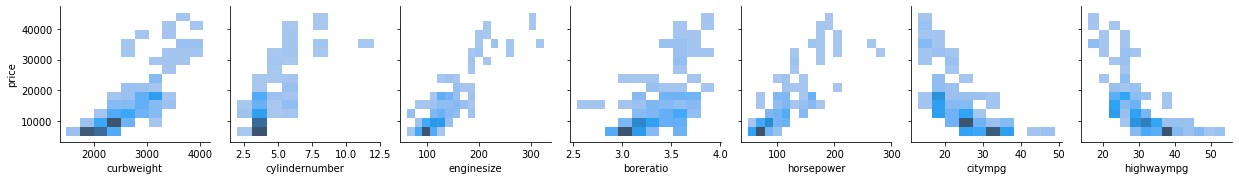

None


In [103]:
print(hist_price(df))

In [104]:
print(r2_score(y_test, pred))

0.810458936265747


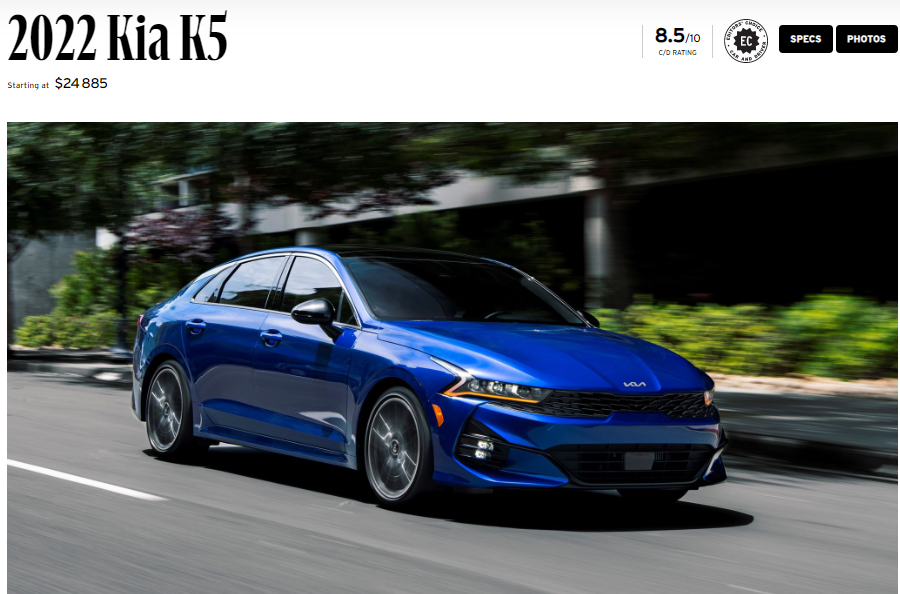

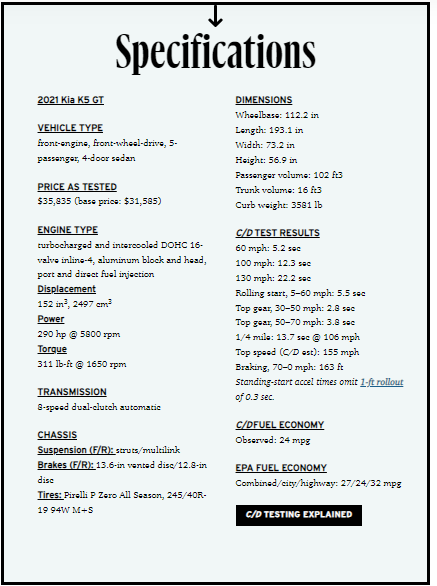

In [105]:
# 1.fueltypes             yonilg'i turi                               (diesel=0, benzin=1)
# 2.aspiration            standart yoki turbo dvigitel                (str=0, turbo=1)          
# 3.drivewheels           tortuvchi g'ildiraklari                     (rwd=1, fwd=2, 4wd=3)
# 4.enginelocation        dvigitel joylashuvi                         (rear=0, front=1)
# 5.wheelbase             balonlar orasidagi masofa                   (feet/in.)
# 6.carlength             avto uzunligi                               (feet/in.)
# 7.carwidth              avto eni                                    (feet/in.)
# 8.curbweight            to'la vazni                                 (kg)
# 9.cylindernumber        silindrlar soni                             (int.)
# 10.enginesize           mator o'lchami                              (sm^3/litr || feet/in.)
# 11.boreratio            silingr diametri                            (feet/in.)
# 12.horsepower           ot kuchi                                    (int.)
# 13.citympg              shaxar ichida yonilg'i harajati             (1Gallon/Mile)
# 14.highwaympg           shaxar tashqarisida yonilg'i harajati       (1Gallon/Mile)

In [106]:
# Kia k5 GT 2.5 turbo avtomabilining yuqoridagi ko'rsatkichlar bo'yicha husuyiyatlari.
kia_k5 = np.array([1,1,2,1,112.2,193.1,73.2,1624,4,152,3.48,290,24,32]).reshape(1,-1)
pred_kia_k5 = fitt.predict(kia_k5)
print(f"Bu Kia avtomabilining bashorat qilingan narxi:  {round(pred_kia_k5[0],2)} $")

Bu Kia avtomabilining bashorat qilingan narxi:  29678.8 $


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###############################################################################################################################

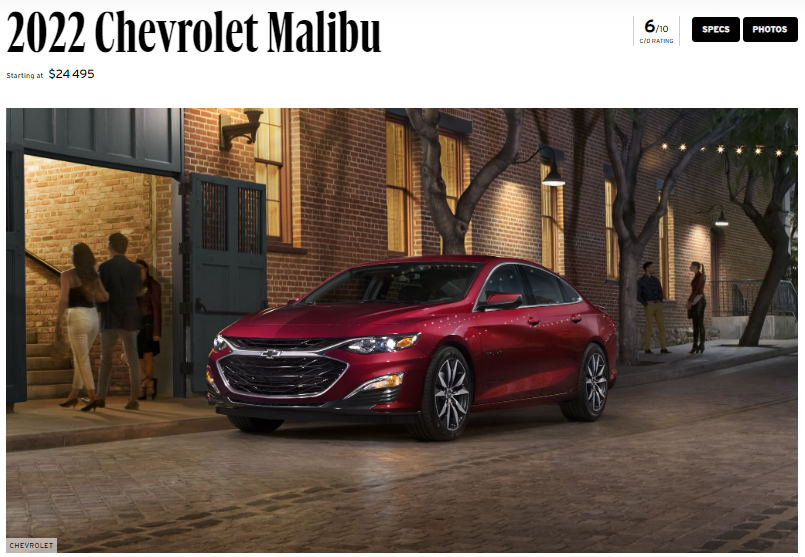

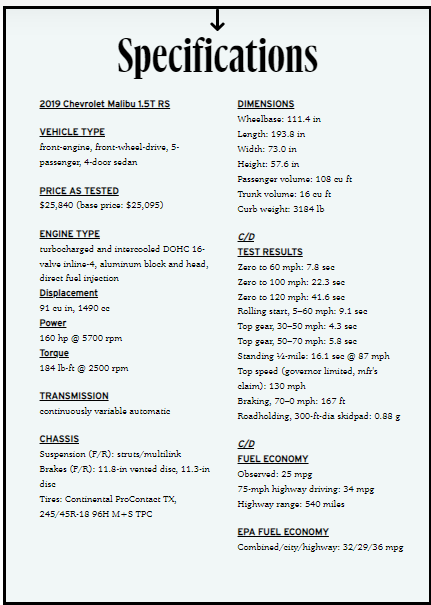

In [107]:
# 1.fueltypes             yonilg'i turi                               (diesel=0, benzin=1)
# 2.aspiration            standart yoki turbo dvigitel                (str=0, turbo=1)          
# 3.drivewheels           tortuvchi g'ildiraklari                     (rwd=1, fwd=2, 4wd=3)
# 4.enginelocation        dvigitel joylashuvi                         (rear=0, front=1)
# 5.wheelbase             balonlar orasidagi masofa                   (feet/in.)
# 6.carlength             avto uzunligi                               (feet/in.)
# 7.carwidth              avto eni                                    (feet/in.)
# 8.curbweight            to'la vazni                                 (kg)
# 9.cylindernumber        silindrlar soni                             (int.)
# 10.enginesize           mator o'lchami                              (sm^3/litr || feet/in.)
# 11.boreratio            silingr diametri                            (feet/in.)
# 12.horsepower           ot kuchi                                    (int.)
# 13.citympg              shaxar ichida yonilg'i harajati             (1Gallon/Mile)
# 14.highwaympg           shaxar tashqarisida yonilg'i harajati       (1Gallon/Mile)

In [108]:
# Malibu 2 1.5 turbo avtomabilining yuqoridagi ko'rsatkichlar bo'yicha husuyiyatlari.
malibu_2 = np.array([1,1,2,1,111.4,193.8,73,1444.2,4,91,2.9,160,25,34]).reshape(1,-1)

# Malumotlarning bashorat qiluvchi funksiya
pred_malibu = fitt.predict(malibu_2)

print(f"Bu Malibu avtomabilining bashorat qilingan narxi:  {round(pred_malibu[0],2)} $")

Bu Malibu avtomabilining bashorat qilingan narxi:  20013.4 $


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
